In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from scipy.integrate import solve_ivp
from utils import *


## Trying with actual force measurements and interpolation

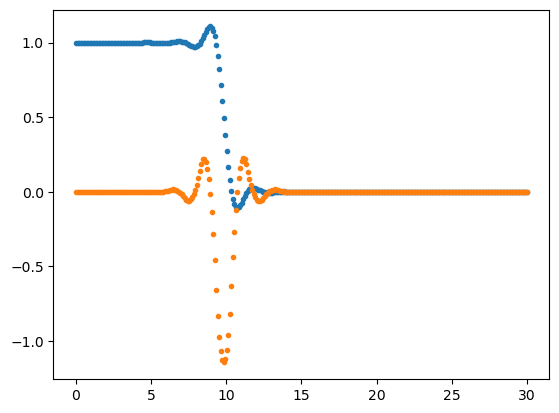

In [2]:
# example of stress: box function 
time = np.linspace(0, 30, 30)
time_ = np.linspace(0, 30, 300)

stress = [1 for i in range(10)] + [0 for i in range(20)]
stress_interp = CubicSpline(time, stress)
strain = np.zeros_like(stress)
dstress_dt = stress_interp.derivative()

plt.plot(time_, stress_interp(time_), '.')
plt.plot(time_, dstress_dt(time_), '.')
# plt.show()

In [3]:
def jeff_prediction(t, X, tau_1, tau_2, eta_2, stress, dstress_dt) -> list:
    # u(t) = de_dt
    u, e = X
    s = stress(t)
    ds_dt = dstress_dt(t)
    du_dt = 1/(eta_2*tau_2)*(tau_1 * ds_dt + s - eta_2 * u)
    de_dt = u
    return [du_dt, de_dt]

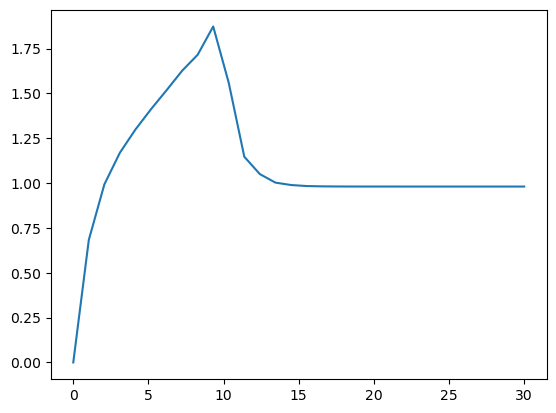

In [4]:
# parameters
tau_1 = 10
tau_2 = 1
eta_2 = 10
stress_interp = CubicSpline(time, stress)
dstress_dt = stress_interp.derivative()
# stress_interp = 1
# dstress_dt = 0


# Initial conditions
u_0 = 1 # not true ??
e_0 = 0

# Time span
t_span = (0, 30)  # Time interval for the simulation (min)
t_eval = np.linspace(*t_span, 100)  # Points at which to store the solution

solution = solve_ivp(jeff_prediction, t_span, [u_0, e_0], args=(tau_1, tau_2, eta_2, stress_interp, dstress_dt), t_eval=time)

plt.plot(time, solution.y[1])
plt.show()



## Mike's model

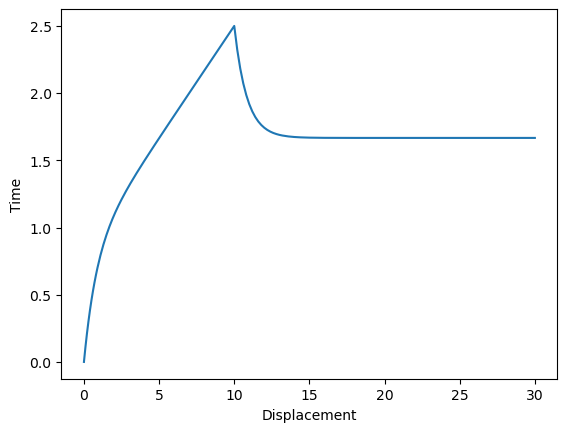

In [5]:
# mikes model
def jeff_model(k, tau1, gamma):
    
    F = 1
    
    t1 = 10
    t2 = 30
    
    t_on = np.linspace(0, t1, 101)
    t_off = np.linspace(t1, t2, 101)
    
    y1_on = F / gamma * (1 - np.exp(- t_on * (k / gamma + 1 / tau1)))
    y2_on = F / gamma * t_on
    
    y1_off = y1_on[-1] * np.exp(- (t_off - t_off[0]) * (k / gamma + 1 / tau1))
    y2_off = y2_on[-1]
    
    x_on = (y1_on + gamma / k / tau1 * y2_on) / (1 + gamma / k / tau1)
    x_off = (y1_off + gamma / k / tau1 * y2_off) / (1 + gamma / k / tau1)

    return [list(t_on)+list(t_off), list(x_on) + list(x_off)]

k = 1
tau1 = 5
gamma = 1
t, x = jeff_model(k, tau1, gamma)
plt.plot(t, x)
plt.xlabel('Displacement')
plt.ylabel('Time')
plt.show()

## Minc's Jeffrey's model, rewritten, full fit 

In [6]:
t = np.linspace(0, 30, 100)
eta_1 = 1
eta_2 = 10
k = 1

F_0 = 5
a = 0.75
t_1 = 10

x = jeff_full(t, k, eta_1, eta_2, a, F_0, t_1)

plt.plot(t, x, 'k.')
plt.show()

TypeError: jeff_full() takes 6 positional arguments but 7 were given